In [1]:
!pip install rdkit-pypi pandas seaborn mols2grid requests

In [2]:
from rdkit import Chem #RDKit Chemistry
from rdkit.Chem.Draw import IPythonConsole #RDKit drawing
from rdkit.Chem import Draw #RDKit drawing
# A few settings to improve the quality of structures 
from rdkit.Chem import rdDepictor
IPythonConsole.ipython_useSVG = True
rdDepictor.SetPreferCoordGen(True)
from rdkit.Chem import PandasTools #Add the ability to add a molecule to a dataframe
import mols2grid #The mols2grid library provides a convenient way of displaying molecules in a grid
import requests

In [3]:
mols = [x for x in Chem.SDMolSupplier("drugbank-structures.sdf")]

[20:27:35] Explicit valence for atom # 28 N, 4, is greater than permitted
[20:27:35] ERROR: Could not sanitize molecule ending on line 321019
[20:27:35] ERROR: Explicit valence for atom # 28 N, 4, is greater than permitted
[20:27:35] WARNING: not removing hydrogen atom without neighbors
[20:27:35] WARNING: not removing hydrogen atom without neighbors


In [4]:
mols

 ...]

In [6]:
df = PandasTools.LoadSDF("drugbank-structures.sdf")

[20:27:44] Explicit valence for atom # 28 N, 4, is greater than permitted
[20:27:44] ERROR: Could not sanitize molecule ending on line 321019
[20:27:44] ERROR: Explicit valence for atom # 28 N, 4, is greater than permitted
[20:27:45] WARNING: not removing hydrogen atom without neighbors
[20:27:45] WARNING: not removing hydrogen atom without neighbors


In [7]:
list(df)

['DATABASE_ID',
 'DATABASE_NAME',
 'SMILES',
 'INCHI_IDENTIFIER',
 'INCHI_KEY',
 'FORMULA',
 'MOLECULAR_WEIGHT',
 'EXACT_MASS',
 'JCHEM_ACCEPTOR_COUNT',
 'JCHEM_ATOM_COUNT',
 'JCHEM_AVERAGE_NEUTRAL_MICROSPECIES_CHARGE',
 'JCHEM_AVERAGE_POLARIZABILITY',
 'JCHEM_BIOAVAILABILITY',
 'JCHEM_DONOR_COUNT',
 'JCHEM_FORMAL_CHARGE',
 'JCHEM_GHOSE_FILTER',
 'JCHEM_IUPAC',
 'ALOGPS_LOGP',
 'JCHEM_LOGP',
 'ALOGPS_LOGS',
 'JCHEM_MDDR_LIKE_RULE',
 'JCHEM_NEUTRAL_CHARGE',
 'JCHEM_NUMBER_OF_RINGS',
 'JCHEM_PHYSIOLOGICAL_CHARGE',
 'JCHEM_PKA',
 'JCHEM_PKA_STRONGEST_ACIDIC',
 'JCHEM_PKA_STRONGEST_BASIC',
 'JCHEM_POLAR_SURFACE_AREA',
 'JCHEM_REFRACTIVITY',
 'JCHEM_ROTATABLE_BOND_COUNT',
 'JCHEM_RULE_OF_FIVE',
 'ALOGPS_SOLUBILITY',
 'JCHEM_TRADITIONAL_IUPAC',
 'JCHEM_VEBER_RULE',
 'DRUGBANK_ID',
 'SECONDARY_ACCESSION_NUMBERS',
 'DRUG_GROUPS',
 'GENERIC_NAME',
 'SYNONYMS',
 'PRODUCTS',
 'INTERNATIONAL_BRANDS',
 'ID',
 'ROMol',
 'SALTS']

,MOLECULAR_WEIGHT,GENERIC_NAME,INTERNATIONAL_BRANDS,ROMol
0,2180.2853,Bivalirudin,Angiox; Hirulog,
1,1209.3983,Leuprolide,Camcevi; Leuplin; LeuProMaxx; Memryte; Prostap...,
2,1269.4105,Goserelin,NaN,
3,1811.253,Gramicidin D,Sofradex,
4,1069.22,Desmopressin,Adiuretin; DesmoMelt,
...,...,...,...,...
2563,498.42,Melphalan flufenamide,Pepaxto,
2564,363.223,Fosdenopterin,Nulibry,
2565,499.52,Serdexmethylphenidate,NaN,
2566,452.518,Belumosudil,Rezurock,

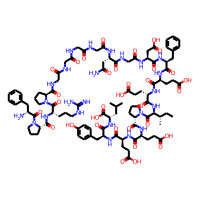
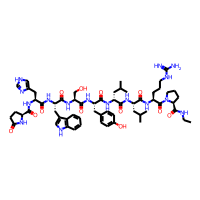
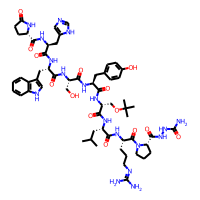
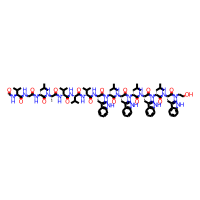
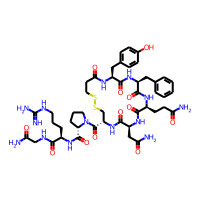
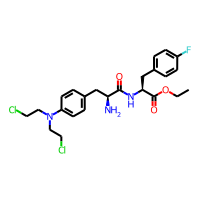
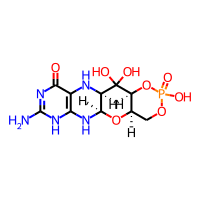
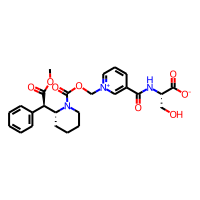
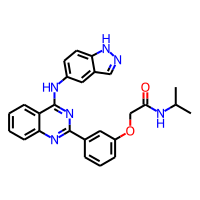
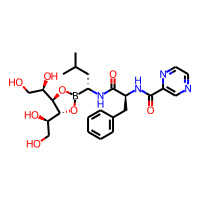

In [8]:
filter = df.filter(items=['MOLECULAR_WEIGHT', 'GENERIC_NAME', 'INTERNATIONAL_BRANDS', 'ROMol',])
filter

In [12]:
from rdkit.Chem.Descriptors import MolWt
from rdkit.Chem.Crippen import MolLogP
df['MW'] = [MolWt(x) for x in df.ROMol]
df['LogP'] = [MolLogP(x) for x in df.ROMol]

In [14]:
two_decimals = lambda x: f"{x:.2f}"
mols2grid.display(df,mol_col="ROMol",subset=["img","MW","LogP", "GENERIC_NAME"],transform={"MW" : two_decimals, "LogP": two_decimals})

MolGridWidget()

In [16]:
import seaborn as sns

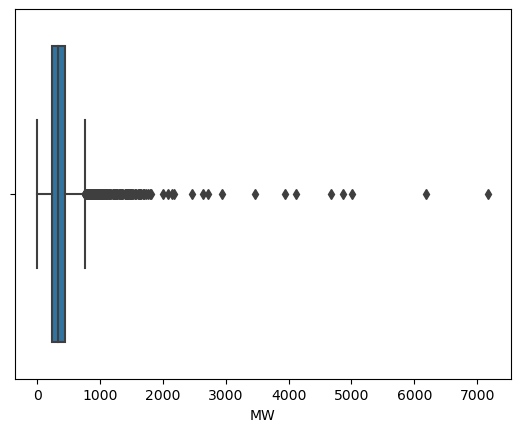

In [17]:
ax = sns.boxplot(x=df.MW)

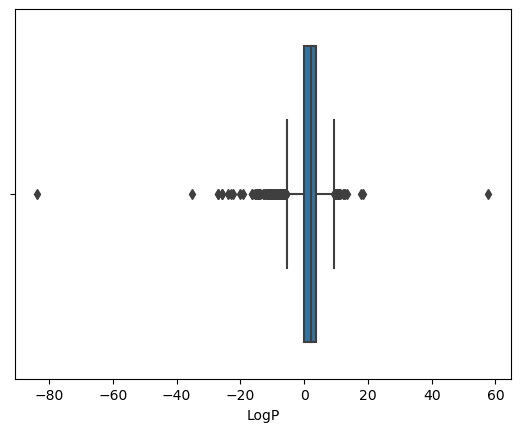

In [20]:
ax = sns.boxplot(x=df.LogP)

In [22]:
import pandas as pd
import numpy as np

In [23]:
%matplotlib inline

In [24]:
df.shape

(2567, 46)

In [26]:
df.dtypes

DATABASE_ID                                   object
DATABASE_NAME                                 object
SMILES                                        object
INCHI_IDENTIFIER                              object
INCHI_KEY                                     object
FORMULA                                       object
MOLECULAR_WEIGHT                              object
EXACT_MASS                                    object
JCHEM_ACCEPTOR_COUNT                          object
JCHEM_ATOM_COUNT                              object
JCHEM_AVERAGE_NEUTRAL_MICROSPECIES_CHARGE     object
JCHEM_AVERAGE_POLARIZABILITY                  object
JCHEM_BIOAVAILABILITY                         object
JCHEM_DONOR_COUNT                             object
JCHEM_FORMAL_CHARGE                           object
JCHEM_GHOSE_FILTER                            object
JCHEM_IUPAC                                   object
ALOGPS_LOGP                                   object
JCHEM_LOGP                                    